In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")
uploaded= files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Saving train_csv.csv to train_csv.csv


In [2]:
df =pd.read_csv('train_csv.csv') 
df.time= pd.to_datetime(df.time)
df=df.set_index(df.time)
df.drop(['id','time'] ,axis=1, inplace=True)
df.head(5)

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [0]:
scaler= MinMaxScaler()
scaler.fit(df)
train= scaler.transform(df)
#test= scaler.transform(test)

In [47]:
n_input=11
n_features=1
generators=TimeseriesGenerator(train,train, length=n_input, batch_size=3)
model= Sequential()
model.add(LSTM(300, activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1,activation ='relu'))
model.compile(optimizer='adam' , loss='mse')
model.fit_generator(generators,epochs=200)

Epoch 1/200
23/23 [==============================] - 1s 42ms/step - loss: 0.0929
Epoch 2/200
23/23 [==============================] - 1s 27ms/step - loss: 0.0468
Epoch 3/200
23/23 [==============================] - 1s 29ms/step - loss: 0.0514
Epoch 4/200
23/23 [==============================] - 1s 28ms/step - loss: 0.0492
Epoch 5/200
23/23 [==============================] - 1s 29ms/step - loss: 0.0435
Epoch 6/200
23/23 [==============================] - 1s 29ms/step - loss: 0.0457
Epoch 7/200
23/23 [==============================] - 1s 29ms/step - loss: 0.0457
Epoch 8/200
23/23 [==============================] - 1s 28ms/step - loss: 0.0429
Epoch 9/200
23/23 [==============================] - 1s 28ms/step - loss: 0.0452
Epoch 10/200
23/23 [==============================] - 1s 28ms/step - loss: 0.0435
Epoch 11/200
23/23 [==============================] - 1s 28ms/step - loss: 0.0439
Epoch 12/200
23/23 [==============================] - 1s 27ms/step - loss: 0.0424
Epoch 13/200
23/23 [=====

In [0]:
n_input=11
pred_list=[]
batch=train[-n_input:].reshape(1,n_input,n_features)
for i in range(n_input):
  pred_list.append(model.predict(batch)[0])
  batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [51]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index,columns=['prediction'])
df_predict.tail()


,prediction
time,
2019-03-19 00:12:30,248.519764
2019-03-19 00:12:40,21.360000
2019-03-19 00:12:50,132.898557
2019-03-19 00:13:00,138.303648
2019-03-19 00:13:10,171.264298


In [53]:
df_test=pd.concat([df,df_predict],axis=1)
df_test.tail()

,feature,prediction
time,,
2019-03-19 00:12:30,469.72,248.519764
2019-03-19 00:12:40,406.79,21.360000
2019-03-19 00:12:50,128.91,132.898557
2019-03-19 00:13:00,85.28,138.303648
2019-03-19 00:13:10,121.12,171.264298


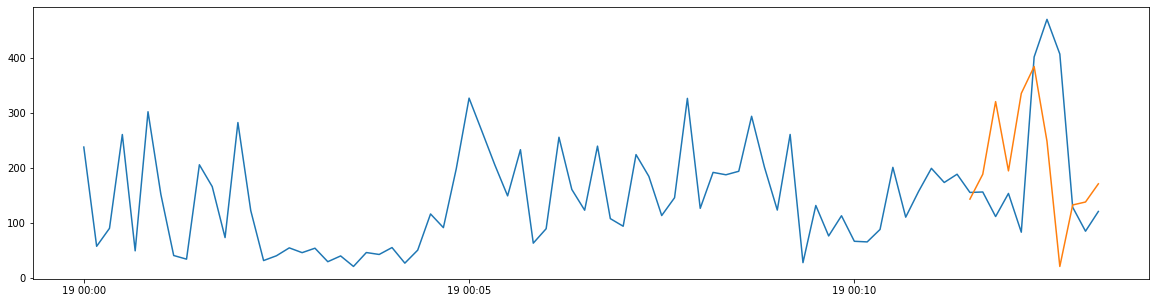

In [54]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index,df_test['feature'])
plt.plot(df_test.index,df_test['prediction'])
plt.show()

In [0]:
n_input=11
pred_list=[]
batch=train[-n_input:].reshape(1,n_input,n_features)
for i in range(40):
  pred_list.append(model.predict(batch)[0])
  batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [80]:
uploaded= files.upload()
df1=pd.read_csv('test_csv.csv')

df1.time= pd.to_datetime(df1.time)
df1=df1.set_index(df1.time,inplace=True)
df1.drop(['id','time'] ,axis=1, inplace=True)
df1.head()



Saving test_csv.csv to test_csv (3).csv


,id,time
time,,
2019-03-19 00:13:20,80,2019-03-19 00:13:20
2019-03-19 00:13:30,81,2019-03-19 00:13:30
2019-03-19 00:13:40,82,2019-03-19 00:13:40
2019-03-19 00:13:50,83,2019-03-19 00:13:50
2019-03-19 00:14:00,84,2019-03-19 00:14:00


In [82]:
future_dates= pd.DataFrame(index=df1[0:].index,columns=df.columns)
future_dates.tail()

,feature
time,
2019-03-19 00:19:10,NaN
2019-03-19 00:19:20,NaN
2019-03-19 00:19:30,NaN
2019-03-19 00:19:40,NaN
2019-03-19 00:19:50,NaN


In [84]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),index=future_dates[0:40].index,columns=['prediction'])
df_proj= pd.concat([df,df_predict],axis=1)
df_proj.tail()

,feature,prediction
time,,
2019-03-19 00:19:10,NaN,67.084688
2019-03-19 00:19:20,NaN,69.802831
2019-03-19 00:19:30,NaN,75.086864
2019-03-19 00:19:40,NaN,175.994452
2019-03-19 00:19:50,NaN,279.250802


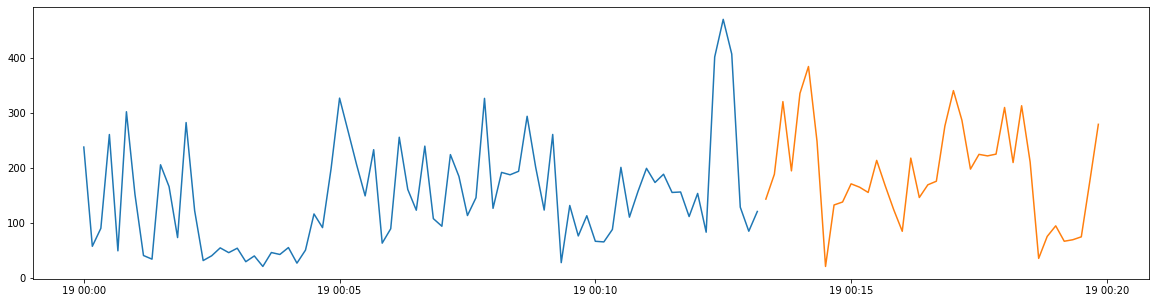

In [85]:
plt.figure(figsize=(20,5))
plt.plot(df_proj.index,df_proj['feature'])
plt.plot(df_proj.index,df_proj['prediction'])
plt.show()

In [86]:
df_proj.tail(50)

,feature,prediction
time,,
2019-03-19 00:11:40,156.46,NaN
2019-03-19 00:11:50,111.91,NaN
2019-03-19 00:12:00,153.83,NaN
2019-03-19 00:12:10,83.51,NaN
2019-03-19 00:12:20,401.43,NaN
2019-03-19 00:12:30,469.72,NaN
2019-03-19 00:12:40,406.79,NaN
2019-03-19 00:12:50,128.91,NaN
2019-03-19 00:13:00,85.28,NaN


In [0]:
sol=pd.DataFrame(scaler.inverse_transform(pred_list),columns=['feature'])


In [92]:
solu=pd.read_csv('test_csv.csv')
def_solution=pd.concat([solu,sol],axis=1)
def_solution.drop(['id','time'],axis=1,inplace=True)
def_solution=def_solution.set_index(def_solution.id)
def_solution.head()

,id,feature
id,,
80,80,143.539801
81,81,188.669378
82,82,320.449417
83,83,194.778829
84,84,335.392518


In [95]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
def_solution.to_csv('Solution.csv')

In [0]:
!cp Solution.csv "drive/My Drive/"